<a href="https://colab.research.google.com/github/hamzafrd/Machine-Learning-terapan/blob/main/Dicoding_sub_1_ML_terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Analysis - Crypto Currency Historical Prices (DogeCoin)**
---
Dataset Source : https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Dogecoin.csv  

## About me
---
Nama  : Hamza Firdaus  
Email : hamzaf625@gmail.com

## Data Loading

### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import math

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Dataset

In [161]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Colab/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download sudalairajkumar/cryptocurrencypricehistory/download?datasetVersionNumber=3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cryptocurrencypricehistory.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip cryptocurrencypricehistory -d '/content/DogeCoin'

In [ ]:
path = '/content/DogeCoin/coin_Dogecoin.csv'
df = pd.read_csv(path)
df

Output kode di atas memberikan informasi sebagai berikut:

- Ada 2760  baris (records atau jumlah pengamatan) dalam dataset.  
- Terdapat 10 kolom.

## Exploratory Data Analysis

### Deskripsi Variabel

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB


Berdasarka data diatas, Deskripsi variable sebagai berikut :
-   Sno : adalah nomer tabel
-   Name : Nama Cryptocurrency
-   Symbol : Simbol pada cryptocurrency
-   Date : Tanggal pencatatan data
-   Open : harga pembukaan hari itu
-   Close : harga penutupan hari itu
-   Low : harga terendah hari itu
-   High : harga tertinggi hari itu
-   Volume : volume transaksi perhari
-  Market Cap : Kapitalisasi Pasar berdasarkan USD

Dari output terlihat bahwa:

- Terdapat 3 kolom dengan tipe object, yaitu: name, symbol, dan date. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: High, Low, Open, Volume, Close, dan Marketcap.   
- Marketcap merupakan target fitur kali ini.

### Drop Table yang tidak digunakan untuk analysis

In [164]:
df.drop(['SNo'],axis=1,inplace=True)
df.head(1)

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.00015,0.000299,0.000205,0.0,1.509085e+06


In [60]:
df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


Output kode di atas memberikan informasi statistik pada masing-masing kolom, antara lain:

*   count adalah jumlah sampel pada data.
*   mean adalah nilai rata-rata.
*   std adalah standar deviasi.
*   min yaitu nilai minimum setiap kolom.
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas *   *   interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum

### Menangani Missing Value

In [61]:
df.head(1)

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.00015,0.000299,0.000205,0.0,1.509085e+06


In [62]:
x = (df.High == 0).sum()
y = (df.Low == 0).sum()
z = (df.Close == 0).sum()
s = (df.Open == 0).sum()
t = (df.Volume == 0).sum()

print("Nilai 0 di kolom High ada: ", x)
print("Nilai 0 di kolom Low ada: ", y)
print("Nilai 0 di kolom Close ada: ", z)
print("Nilai 0 di kolom Open ada: ", s)
print("Nilai 0 di kolom Open ada: ", t)

Nilai 0 di kolom High ada:  0
Nilai 0 di kolom Low ada:  0
Nilai 0 di kolom Close ada:  0
Nilai 0 di kolom Open ada:  0
Nilai 0 di kolom Open ada:  11


Dari hasil prediksi diatas, terdapat nilai 0 pada volume. **Tetapi**, ini merupakan hal wajar karena bisa saja pada hari itu tidak terjadi transaksi. jadi , dibandingkan menggunakan 0 mari kita cek menggunakan isna() dan isnull()

In [63]:
df.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [64]:
df.isna().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [165]:
df.shape

(2760, 9)

In [66]:
df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


Setelah melakukan pengecekan terhadap missing value, langkah selanjutnya yaitu mengecek outliner.

### Menangani Outliner (Menggunakan box plot kemudian dilanjutkan dengan IQR method)

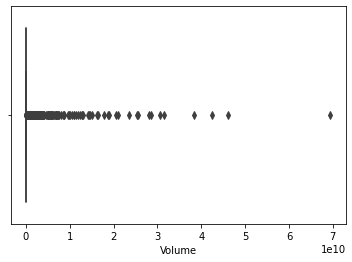

In [166]:
sns.boxplot(x=df['Volume'])

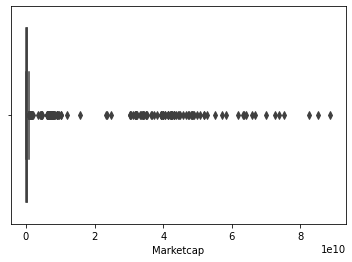

In [68]:
sns.boxplot(x=df['Marketcap'])

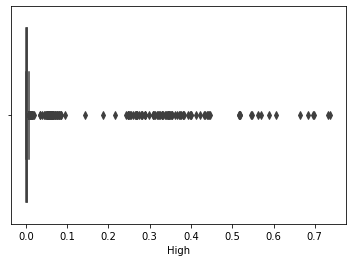

In [69]:
sns.boxplot(x=df['High'])

Jika dilihat dari plot diatas terdapat banyak sekali Outlier pada setiap variabel yang dipilih, maka kita fix dengan IQR

In [178]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(914, 9)

Setelah beberapa kali melakukan IQR, berikut hasilnya :

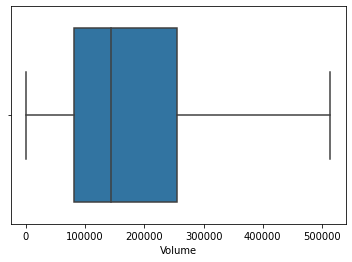

In [179]:
sns.boxplot(x=df['Volume'])

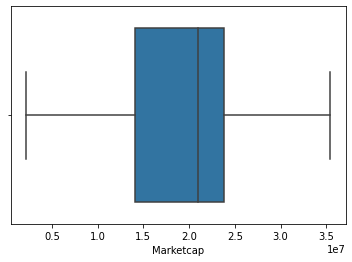

In [180]:
sns.boxplot(x=df['Marketcap'])

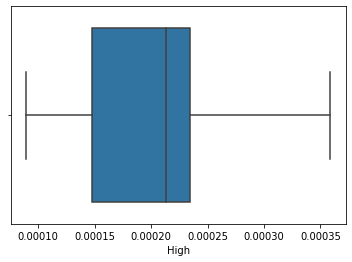

In [181]:
sns.boxplot(x=df['High'])

## Univariate Analysis

Menganalisis Numerical Features pada dataset dengan histogram

In [182]:
df.head(1)

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
1,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06


Bagi fitur menjadi dua bagian

In [129]:
numerical_features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
categorical_features = ['Name', 'Symbol', 'Date']

### Categorical Features

- Fitur Name

          jumlah sampel  persentase
Dogecoin            914       100.0


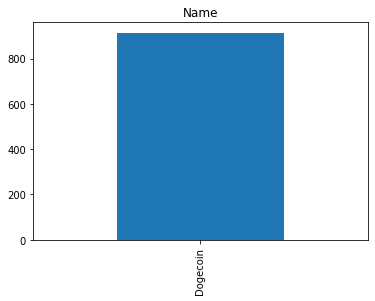

In [130]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_fitur = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_fitur)
count.plot(kind='bar', title=feature);

      jumlah sampel  persentase
DOGE            914       100.0


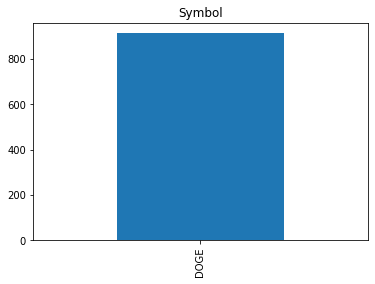

In [131]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_fitur = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_fitur)
count.plot(kind='bar', title=feature);

                     jumlah sampel  persentase
2013-12-17 23:59:59              1         0.1
2016-04-28 23:59:59              1         0.1
2016-04-30 23:59:59              1         0.1
2016-05-01 23:59:59              1         0.1
2016-05-02 23:59:59              1         0.1
...                            ...         ...
2015-06-24 23:59:59              1         0.1
2015-06-25 23:59:59              1         0.1
2015-06-26 23:59:59              1         0.1
2015-06-27 23:59:59              1         0.1
2017-03-29 23:59:59              1         0.1

[914 rows x 2 columns]


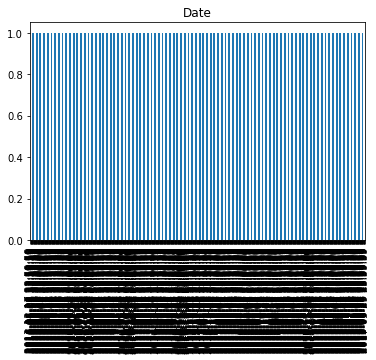

In [134]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_fitur = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_fitur)
count.plot(kind='bar', title=feature);

Bisa Kita lihat, Categorical Features hanya memilih 1 jenis saja. Adapu. dengan tanggal yang dihitung perhari jadi bisa kita fungsikan sama dengan nomer tabel. Hal tersebut membuat ketiga fitur diatas bisa diabaikan.

### Numerical Features

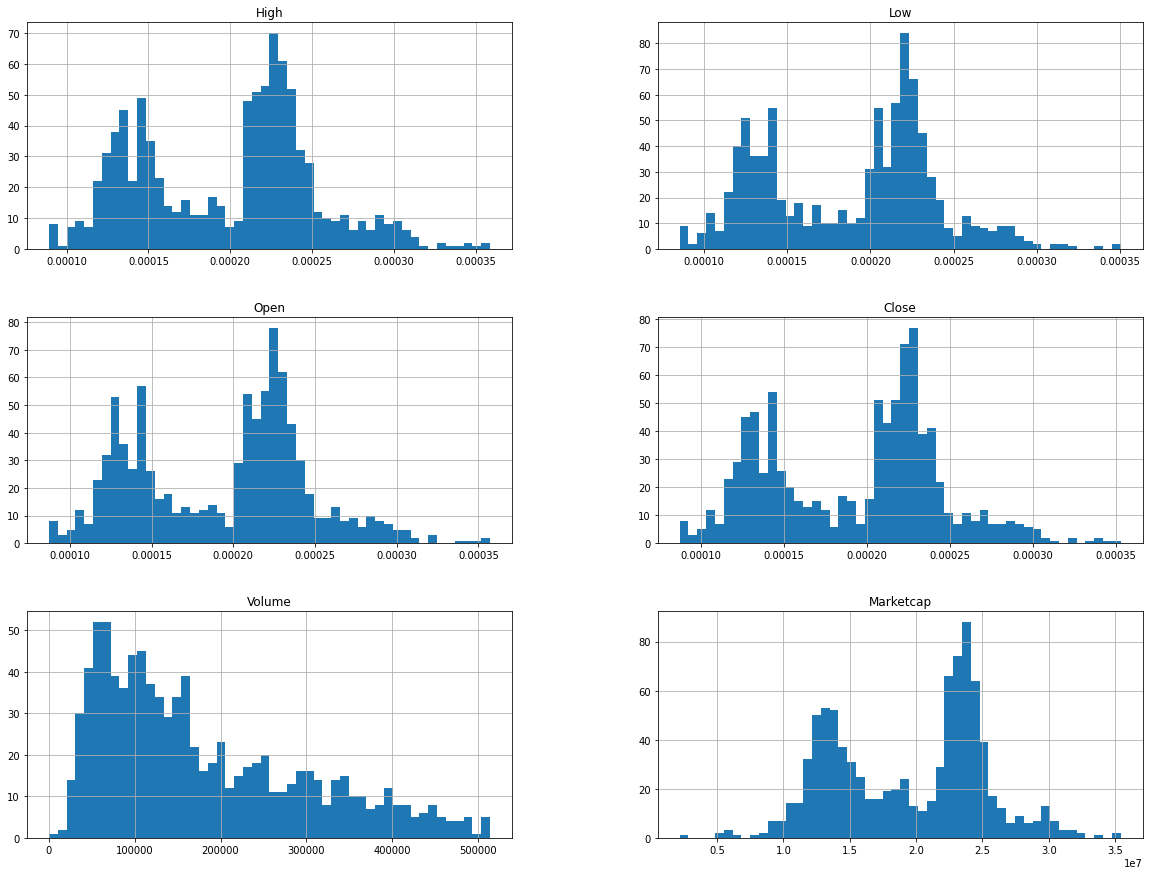

In [137]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

Selanjutnya kita akan menganalisis korelasi fitur "Price Per Month" terhadap fitur lain seperti "Open", "High", "Low", "Close" dan "Average". Dapat disimpulkan bahwa "Price Per Month" memiliki korelasi positif yang kuat terhadap "Open", "High", "Low", "Close" dan "Average".

### Categorical Features

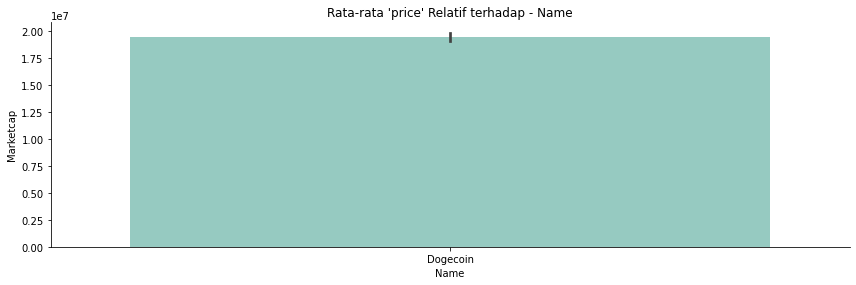

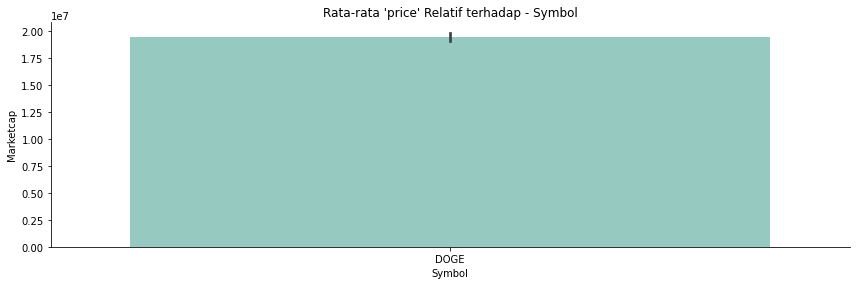

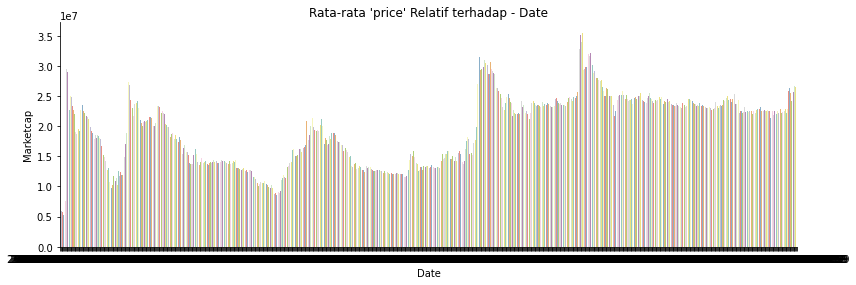

In [139]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Marketcap", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Lagi - lagi bisa kita lihat, name dan sysmbol hanya memiliki 1 label dan date memiliki data yang terlalu acak.

### Numerical Features

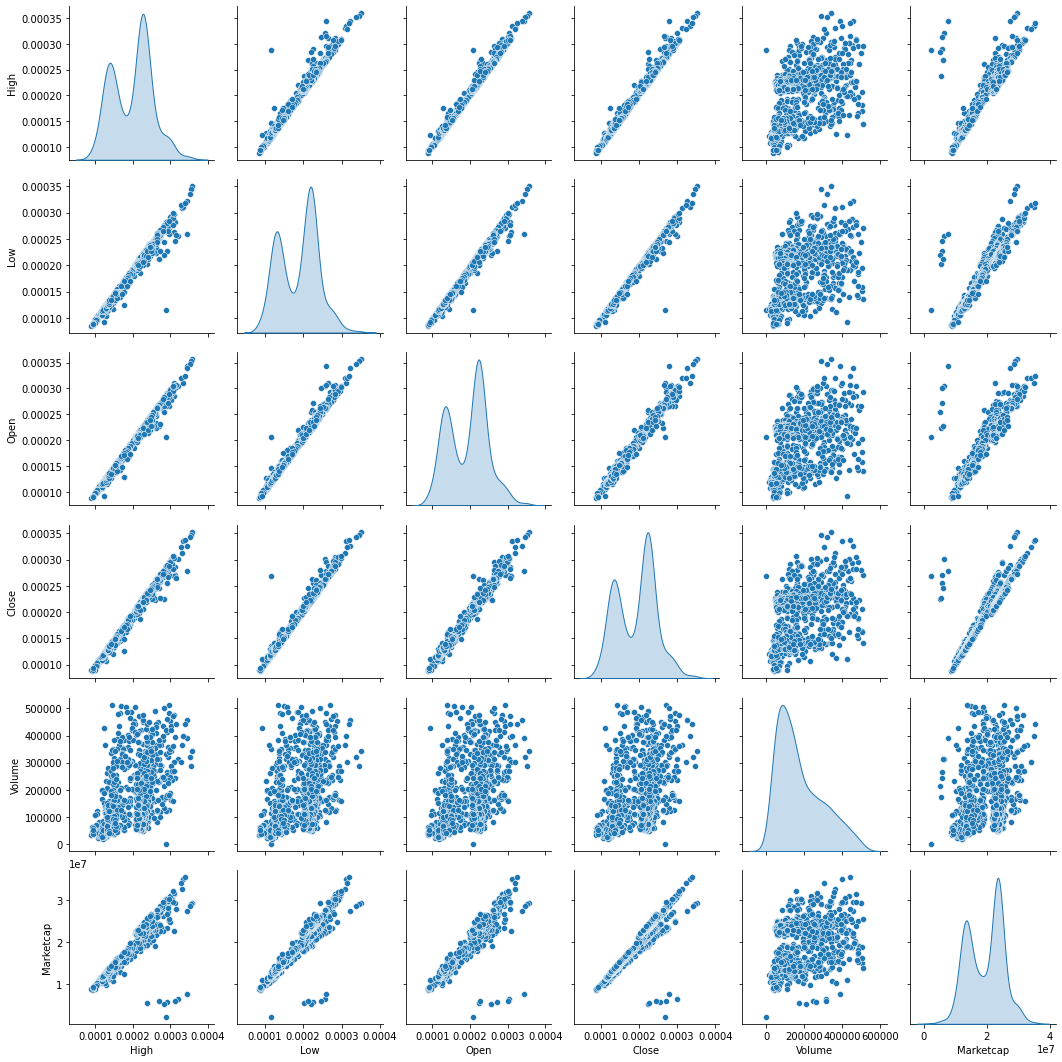

In [140]:
sns.pairplot(df, diag_kind = 'kde')

Terlihat bahwa hampir semua numerical features memiliki korelasi yang tinggi dengan fitur "Marketcap". Sedangkan fitur lainnya yaitu 'volume' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola.

##### Mengevaluasi skor korelasinya, gunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

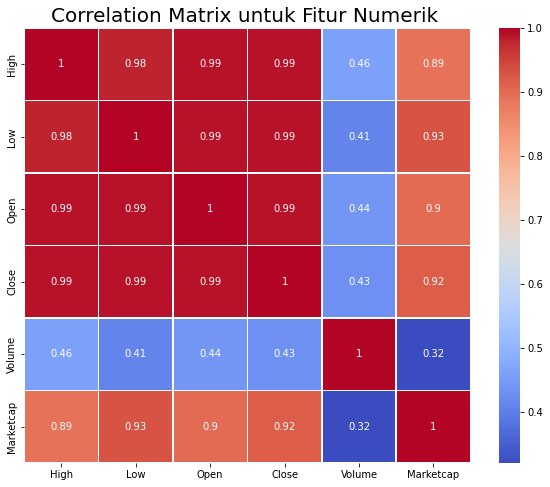

In [142]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Volume memiliki korelasi yang sangat lemah dengan yang lain, artinya jumlah transaksi (volume) tidak ada hubungannya dengan fitur lain.

Semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat.

##### Fitur tidak signifikan di drop.

In [183]:
df.drop(['Volume','Name', 'Symbol', 'Date'], inplace=True, axis=1)
df.head()

,High,Low,Open,Close,Marketcap
1,0.000289,0.000116,0.000207,0.000269,2.169688e+06
19,0.000321,0.000256,0.000305,0.000301,6.323972e+06
20,0.000312,0.000247,0.000300,0.000271,5.883644e+06
21,0.000290,0.000226,0.000271,0.000255,5.711172e+06
22,0.000284,0.000220,0.000255,0.000225,5.198193e+06


## Data Preparation




### Encoding Fitur Kategori
Karena semua data adalah numerik, maka tidak perlu dilakukan one hot encoding.

In [148]:
df

,High,Low,Open,Close,Marketcap
1,0.000289,0.000116,0.000207,0.000269,2.169688e+06
19,0.000321,0.000256,0.000305,0.000301,6.323972e+06
20,0.000312,0.000247,0.000300,0.000271,5.883644e+06
21,0.000290,0.000226,0.000271,0.000255,5.711172e+06
22,0.000284,0.000220,0.000255,0.000225,5.198193e+06
...,...,...,...,...,...
1190,0.000239,0.000226,0.000235,0.000236,2.566742e+07
1191,0.000248,0.000227,0.000227,0.000246,2.668854e+07
1192,0.000247,0.000235,0.000245,0.000243,2.644770e+07
1193,0.000245,0.000235,0.000239,0.000242,2.630884e+07


### Reduksi Dimensi dengan PCA

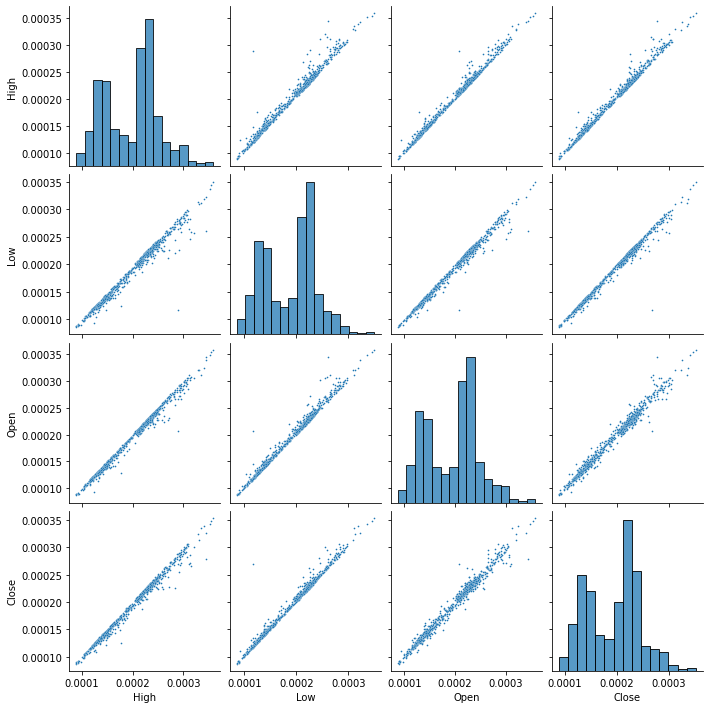

In [184]:
sns.pairplot(df[['High','Low','Open','Close']], plot_kws={"s": 3});

#### Aplikasikan dengan PCA

In [185]:
pca = PCA(n_components=4, random_state=123)
pca.fit(df[['High','Low','Open','Close']])
princ_comp = pca.transform(df[['High','Low','Open','Close']])

In [187]:
pca.explained_variance_ratio_.round(3)

array([0.993, 0.004, 0.003, 0.   ])

#### Transformasi PCA

In [200]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['High','Low','Open','Close']])
df['Penjualan Perhari'] = pca.transform(df.loc[:, ('High','Low','Open','Close')]).flatten()
df.drop(['High','Low','Open','Close'], axis=1, inplace=True)

In [201]:
df.head()

,Marketcap,Penjualan Perhari
1,2.169688e+06,0.000055
19,6.323972e+06,0.000204
20,5.883644e+06,0.000179
21,5.711172e+06,0.000135
22,5.198193e+06,0.000105


### Train Test Split

In [203]:
X = df.drop(["Marketcap"],axis =1)
y = df["Marketcap"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Membagis train dan test 90:10

In [204]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 914
Total # of sample in train dataset: 822
Total # of sample in test dataset: 92


### Standarisasi

Dengan tujuan supaya lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal.

In [ ]:
X_train

In [212]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

## Model Development

- Siapkan dataframe untuk analisis

In [216]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

In [217]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

In [218]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Boosting Algorithm

In [219]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model
Model selesai dilatih dengan 3 algoritma, yaitu KNN, Random Forest, dan Adaboost, kita perlu melakukan proses scaling (sudah dilakukan diawal) terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

In [221]:
X_test = scaler.transform(X_test)

In [222]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,3741367008.959907,13528461051.676819
RF,882033564.682651,15164722707.264061
Boosting,5237555405.464601,16243955068.628763


#### Plotting

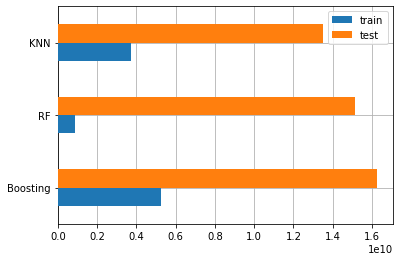

In [223]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Boosting memberikan nilai eror yang paling kecil. Model inilah yang dapat digunakan sebagai model terbaik untuk melakukan prediksi harga DogeCoin.

### Uji Model

In [232]:
prediksi = X_test.copy()
pred_dict = {'y_true':y_test.sum()}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,1.718318e+09,28645695.9,31955555.2,31513942.4
1,1.718318e+09,14620992.6,14603322.2,14224159.2
2,1.718318e+09,22176594.4,22687546.5,21659212.6
3,1.718318e+09,23253560.8,23682749.1,22623973.9
4,1.718318e+09,14153836.1,13431913.4,14084595.6
...,...,...,...,...
87,1.718318e+09,20987850.4,20140514.3,21521794.9
88,1.718318e+09,13828144.5,13766858.6,14084595.6
89,1.718318e+09,20329981.8,19325418.1,21521794.9
90,1.718318e+09,24066930.2,24170049.2,22710028.7
